In [21]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import scipy
from skimage.transform import hough_line, hough_line_peaks

## Rozciąganie histogramu

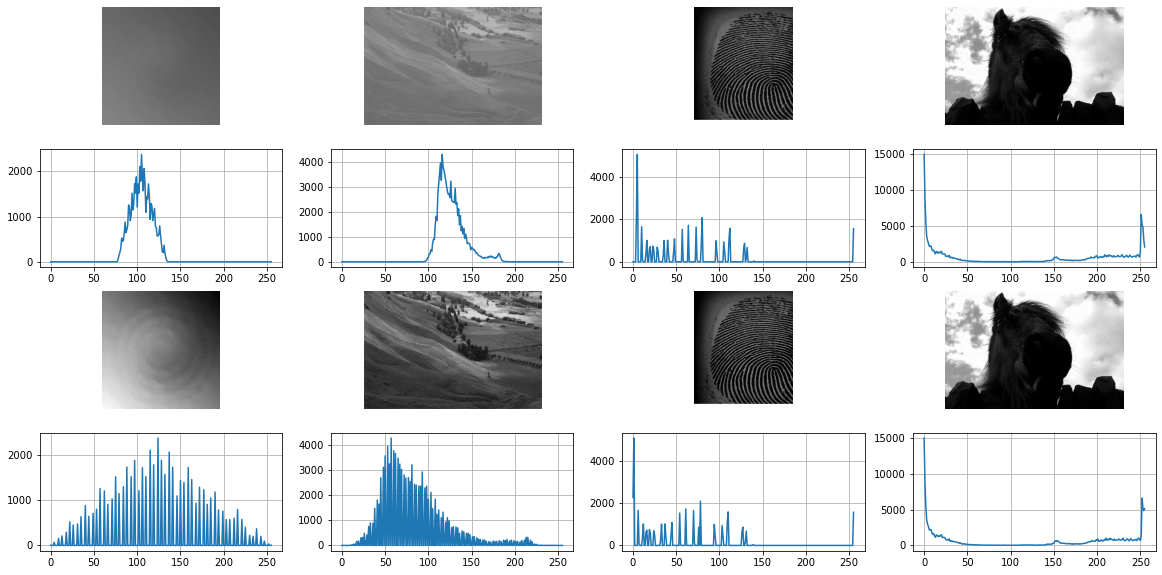

In [2]:
hist = []
hist_hist = []
hist_norm = []
hist_hist_norm = []
hist.append(cv2.imread('hist1.bmp', cv2.IMREAD_GRAYSCALE))
hist.append(cv2.imread('hist2.bmp', cv2.IMREAD_GRAYSCALE))
hist.append(cv2.imread('hist3.bmp', cv2.IMREAD_GRAYSCALE))
hist.append(cv2.imread('hist4.bmp', cv2.IMREAD_GRAYSCALE))

hist_hist.append(cv2.calcHist([hist[0]], [0], None, [256], [0,256]))
hist_hist.append(cv2.calcHist([hist[1]], [0], None, [256], [0,256]))
hist_hist.append(cv2.calcHist([hist[2]], [0], None, [256], [0,256]))
hist_hist.append(cv2.calcHist([hist[3]], [0], None, [256], [0,256]))

for i in range(4):
    dst = np.zeros(hist[i].shape, 'uint8')
    hist_norm.append(cv2.normalize(hist[i], dst, 0, 256, cv2.NORM_MINMAX))
    hist_hist_norm.append(cv2.calcHist([hist_norm[i]], [0], None, [256], [0,256]))

figHist, axsHist = plt.subplots(4, 4)
figHist.set_size_inches(20, 10)
for i in range(4):
    axsHist[0, i].imshow(hist[i], 'gray', vmin=0, vmax=256)
    axsHist[0, i].axis('off')

    axsHist[1, i].plot(hist_hist[i])
    axsHist[1, i].grid()

    axsHist[2, i].imshow(hist_norm[i], 'gray', vmin=0, vmax=256)
    axsHist[2, i].axis('off')

    axsHist[3, i].plot(hist_hist_norm[i])
    axsHist[3, i].grid()


## Histogram dla obrazów kolorowych i jego wyrównywanie

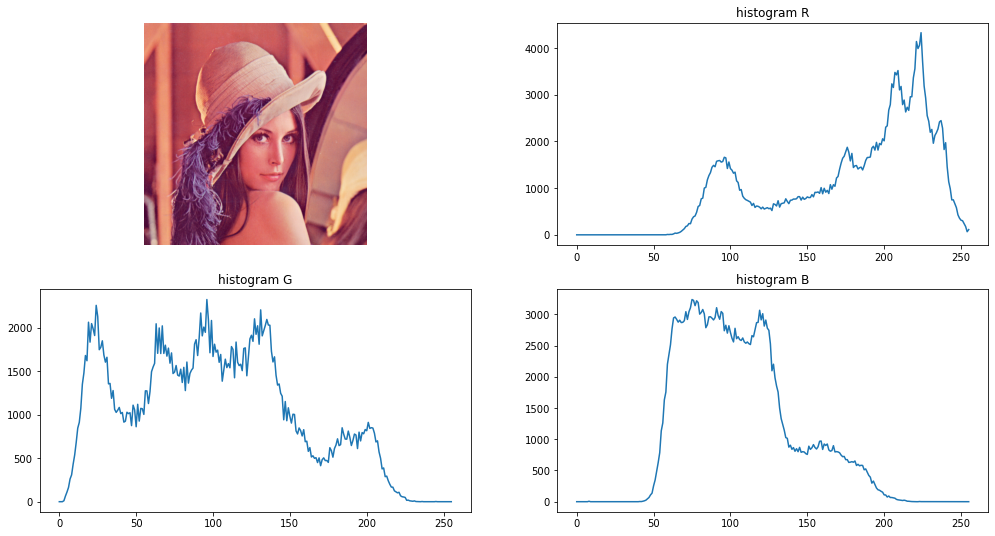

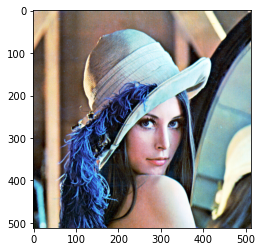

In [3]:
if not os.path.exists("lenaRGB.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lenaRGB.bmp --no-check-certificate

if not os.path.exists("jezioro.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jezioro.jpg --no-check-certificate

lenaBGR = cv2.imread('lenaRGB.bmp')
lenaRGB = cv2.cvtColor(lenaBGR, cv2.COLOR_BGR2RGB)

lenaR_hist = cv2.calcHist([lenaRGB], [0], None, [256], [0, 256])
lenaG_hist = cv2.calcHist([lenaRGB], [1], None, [256], [0, 256])
lenaB_hist = cv2.calcHist([lenaRGB], [2], None, [256], [0, 256])

figlena, axslena = plt.subplots(2,2)
figlena.set_size_inches(17, 9)
axslena[0, 0].imshow(lenaRGB, vmin=0, vmax=256)
axslena[0, 0].axis('off')
axslena[0, 1].plot(lenaR_hist)
axslena[0, 1].set_title("histogram R")
axslena[1, 0].plot(lenaG_hist)
axslena[1, 0].set_title("histogram G")
axslena[1, 1].plot(lenaB_hist)
axslena[1, 1].set_title("histogram B")

lena_eq_R = cv2.equalizeHist(lenaRGB[:,:,0])

lena_eq_G = cv2.equalizeHist(lenaRGB[:,:,1])

lena_eq_B = cv2.equalizeHist(lenaRGB[:,:,2])


lena_new_RGB = lenaRGB
lena_new_RGB[:, :, 0] = lena_eq_R
lena_new_RGB[:, :, 1] = lena_eq_G
lena_new_RGB[:, :, 2] = lena_eq_B

plt.figure()
plt.imshow(lena_new_RGB)



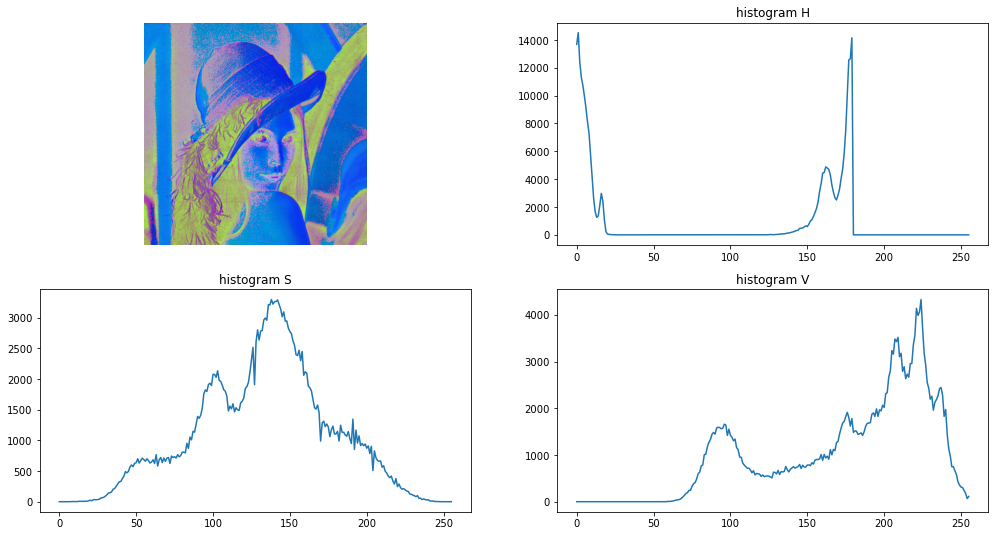

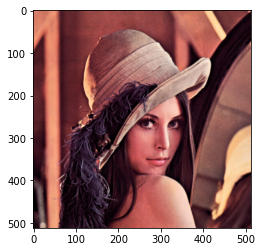

In [4]:
lenaHSV = cv2.cvtColor(lenaBGR, cv2.COLOR_BGR2HSV)

lenaH_hist = cv2.calcHist([lenaHSV], [0], None, [256], [0, 256])
lenaS_hist = cv2.calcHist([lenaHSV], [1], None, [256], [0, 256])
lenaV_hist = cv2.calcHist([lenaHSV], [2], None, [256], [0, 256])

figlena, axslena = plt.subplots(2,2)
figlena.set_size_inches(17, 9)
axslena[0, 0].imshow(lenaHSV, vmin=0, vmax=256)
axslena[0, 0].axis('off')
axslena[0, 1].plot(lenaH_hist)
axslena[0, 1].set_title("histogram H")
axslena[1, 0].plot(lenaS_hist)
axslena[1, 0].set_title("histogram S")
axslena[1, 1].plot(lenaV_hist)
axslena[1, 1].set_title("histogram V")

lena_eq_V = cv2.equalizeHist(lenaHSV[:,:,2])
lena_hist_V = cv2.calcHist([lena_eq_V], [0], None, [256], [0, 256])
lena_hist_V_cum = lena_hist_V.cumsum()

lena_new_HSV = lenaHSV
lena_new_HSV[:, :, 2] = lena_eq_V



lenaHSV_to_RGB = cv2.cvtColor(lena_new_HSV, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(lenaHSV_to_RGB)

## Binaryzacja na podstawie histogramu


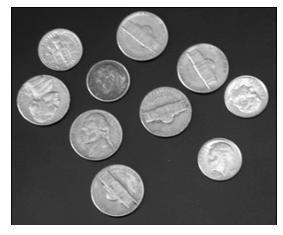

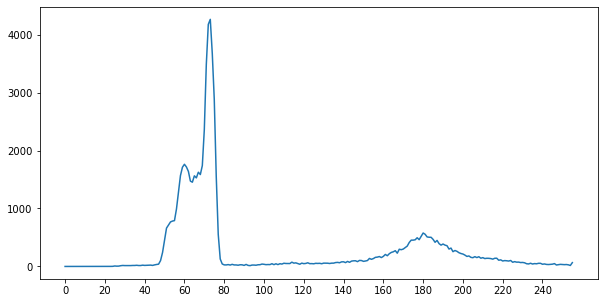

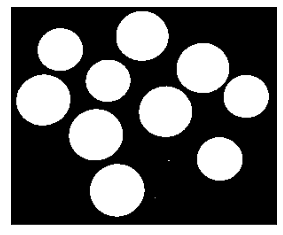

In [5]:
coins = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
catalogue = cv2.imread('catalogue.png', cv2.IMREAD_GRAYSCALE)

def plot_img_hist(chart):
    chart_hist = cv2.calcHist([chart], [0], None, [256], [0, 256])
    fig = plt.figure(figsize=(10, 5))
    plt.plot(chart_hist)
    plt.xticks(np.arange(0, 256, 20.0))
    return fig

plt.figure
plt.imshow(coins, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

plot_img_hist(coins)
plt.show()



coins_bin_b = coins > 80
coins_bin = coins_bin_b.astype(np.int)
plt.figure()
plt.imshow(coins_bin, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

## Binaryzacja z automatycznym progowaniem Otsu

Text(0.5, 1.0, 'catalogue Otsu')

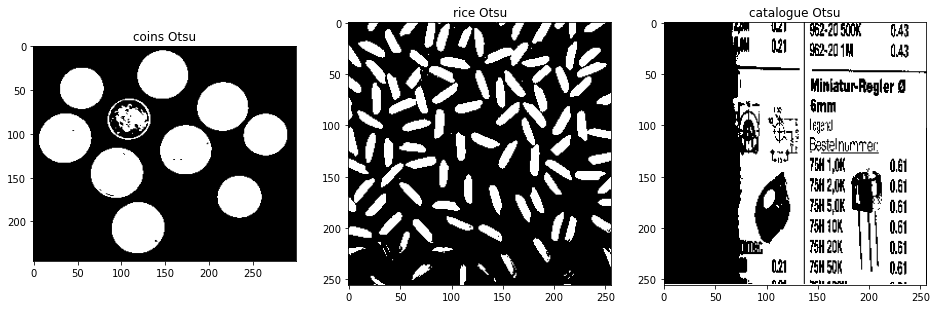

In [6]:
k_coins_ots, coins_ots = cv2.threshold(coins,0, 255,cv2.THRESH_OTSU)
k_rice_ots, rice_ots = cv2.threshold(rice,0, 255,cv2.THRESH_OTSU)
k_catalogue_ots, catalogue_ots = cv2.threshold(catalogue,0, 255,cv2.THRESH_OTSU)


fig, ax = plt.subplots(1, 3, figsize=(16, 13))
ax[0].imshow(coins_ots, 'gray')
ax[0].set_title('coins Otsu')
ax[1].imshow(rice_ots, 'gray')
ax[1].set_title('rice Otsu')
ax[2].imshow(catalogue_ots, 'gray')
ax[2].set_title('catalogue Otsu')

## Binaryzacja lokalna (ręczna)

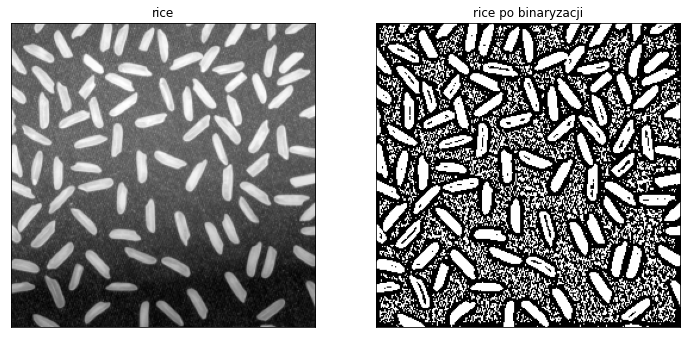

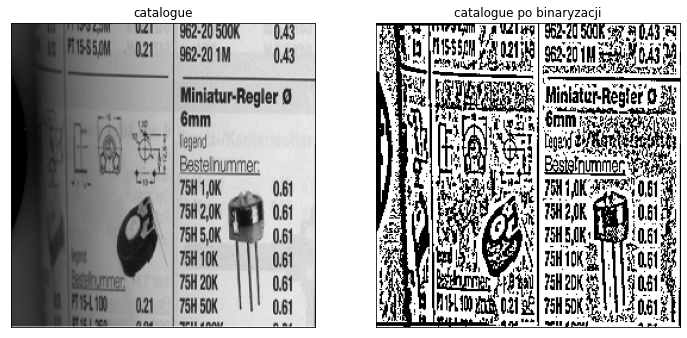

In [7]:
def local_bin(image, W):
    image_bin = np.zeros_like(image)
    (X, Y) = image.shape
    for j in range(int(W/2), int(Y-W/2)):
        for i in range(int(W/2), int(X-W/2)):
            win = image[i-int(W/2): i+int(W/2)+1, j-int(W/2):j+int(W/2)+1]
            pix_mean = np.mean(win)
            image_bin[i, j] = (image[i, j] >= pix_mean).astype(np.int)
            # Dopełnienie ramek:
            if i == int(W/2):
                pix_mean = np.mean(image[:i, :])
                image_bin[:i, :] = (image[:i, :] >= pix_mean).astype(np.int)
            if i == int(X-W/2-1):
                pix_mean = np.mean(image[i+1:, :])
                image_bin[i+1:, :] = (image[i+1:, :] >= pix_mean).astype(np.int)
            if j == int(W/2):
                pix_mean = np.mean(image[:, :j])
                image_bin[:, :j] = (image[:, :j] >= pix_mean).astype(np.int)
            if j == int(Y-W/2-1):
                pix_mean = np.mean(image[:, j+1:])
                image_bin[:, j+1:] = (image[:, j+1:] >= pix_mean).astype(np.int)
    return image_bin

rice_bin = local_bin(rice, 7)
catalogue_bin = local_bin(catalogue, 7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(rice, 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('rice')
ax2.imshow(rice_bin, 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('rice po binaryzacji')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(catalogue, 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('catalogue')
ax2.imshow(catalogue_bin, 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('catalogue po binaryzacji')
plt.show()

## Binaryzacja metoda Sauvoli

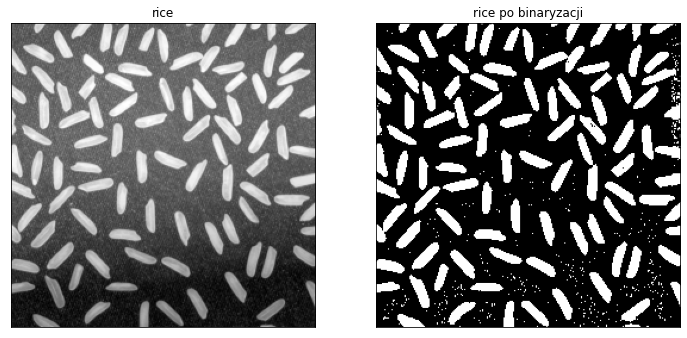

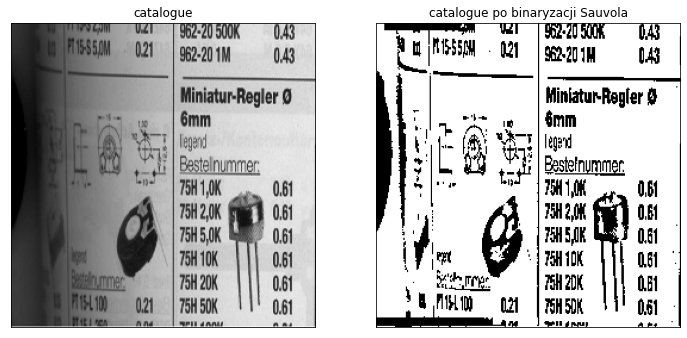

In [8]:
def Sauvoli(image, W, k=0.15, R=128):
    x = 1
    av_bright = np.mean(image)
    if av_bright < 256/2:
        x = -1
    image_bin = np.zeros_like(image)
    (X, Y) = image.shape
    for i in range(int(W/2), int(X-W/2)):
        for j in range(int(W/2), int(Y-W/2)):
            win = image[i-int(W/2): i+int(W/2)+1, j-int(W/2):j+int(W/2)+1]
            pix_mean = np.mean(win)
            pix_std = np.std(win)
            T = pix_mean*(1 + x*k*(pix_std/R - 1))
            image_bin[i, j] = (image[i, j] >= T).astype(np.int)
            # obsluga ramek z wykorzystaniem sredniej
            if i == int(W/2):
                pix_mean = np.mean(image[:i, :])
                image_bin[:i, :] = (image[:i, :] >= pix_mean).astype(np.int)
            if i == int(X-W/2-1):
                pix_mean = np.mean(image[i+1:, :])
                image_bin[i+1:, :] = (image[i+1:, :] >= pix_mean).astype(np.int)
            if j == int(W/2):
                pix_mean = np.mean(image[:, :j])
                image_bin[:, :j] = (image[:, :j] >= pix_mean).astype(np.int)
            if j == int(Y-W/2-1):
                pix_mean = np.mean(image[:, j+1:])
                image_bin[:, j+1:] = (image[:, j+1:] >= pix_mean).astype(np.int)
    return image_bin

rice_bin = Sauvoli(rice, 15)
catalogue_bin = Sauvoli(catalogue, 15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(rice, 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('rice')
ax2.imshow(rice_bin, 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('rice po binaryzacji')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(catalogue, 'gray')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('catalogue')
ax2.imshow(catalogue_bin, 'gray')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('catalogue po binaryzacji Sauvola')
plt.show()

## Interpolacja metodą najbliższego sąsiada

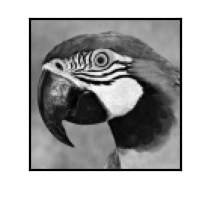

In [11]:
parrot = cv2.imread('parrot.bmp')     
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) 

chess = cv2.imread('chessboard.bmp')     
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY) 


# Display
plt.figure(figsize=(parrot.shape[0]/100,parrot.shape[1]/100), dpi=200)
plt.imshow(parrot, cmap ="gray")
plt.xticks([]), plt.yticks([]) 
plt.show()

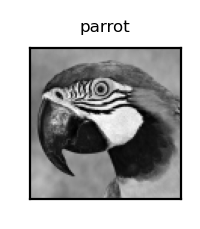

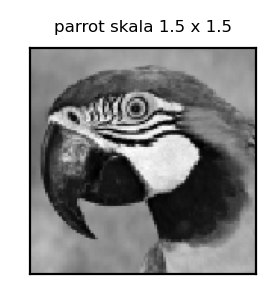

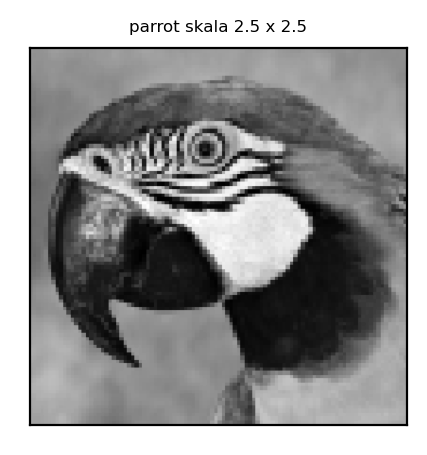

In [12]:
def nb_interpolate(img, fy, fx):
    dsize = (int(img.shape[1] * fx), int(img.shape[0] * fy))
    new_img = np.zeros((dsize[1], dsize[0]))
    X, Y = new_img.shape
    for i in range(X):
        for j in range(Y):
            new_X = int(np.rint(i/fy))
            new_Y = int(np.rint(j/fx))
            if new_X >= img.shape[0]:
                new_X = int(i/fy)
            if new_Y >= img.shape[1]:
                new_Y = int(j/fx)
            new_img[i,j] = img[new_X, new_Y]
    return new_img

plt.figure(figsize=(parrot.shape[0]/100,parrot.shape[1]/100), dpi=200)
plt.imshow(parrot, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.title('parrot', fontsize=6)
plt.show()

parrot_nb = nb_interpolate(parrot, 1.5, 1.5)
plt.figure(figsize=(parrot_nb.shape[0]/100,parrot_nb.shape[1]/100), dpi=200)
plt.imshow(parrot_nb, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.title('parrot skala 1.5 x 1.5', fontsize=6)
plt.show()

parrot_nb = nb_interpolate(parrot, 2.5, 2.5)
plt.figure(figsize=(parrot_nb.shape[0]/100,parrot_nb.shape[1]/100), dpi=200)
plt.imshow(parrot_nb, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.title('parrot skala 2.5 x 2.5', fontsize=6)
plt.show()

## Interpolacja OpenCV

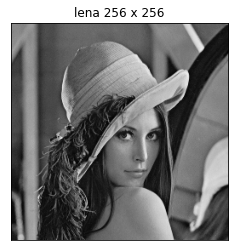

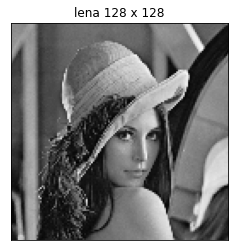

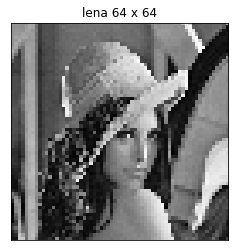

In [13]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
lena64 = cv2.resize(lena, (64, 64), interpolation=cv2.INTER_LANCZOS4)
lena128 = cv2.resize(lena, (128, 128), interpolation=cv2.INTER_LANCZOS4)
lena256 = cv2.resize(lena, (256, 256), interpolation=cv2.INTER_LANCZOS4)

plt.figure
plt.imshow(lena256, 'gray')
plt.title("lena 256 x 256")
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure
plt.imshow(lena128, 'gray')
plt.title("lena 128 x 128")
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure
plt.imshow(lena64, 'gray')
plt.title("lena 64 x 64")
plt.xticks([]), plt.yticks([])
plt.show()

## Filtracja kontekstowa (filtry liniowe uśredniające dolnoprzepustowe)

In [16]:
jet = cv2.imread('jet.png')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)

kw = cv2.imread('kw.png')
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)

moon = cv2.imread('moon.png')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

lenaSzum = cv2.imread('lenaSzum.png')
lenaSzum = cv2.cvtColor(lenaSzum, cv2.COLOR_BGR2GRAY)

lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

plansza = cv2.imread('plansza.png')
plansza = cv2.cvtColor(plansza, cv2.COLOR_BGR2GRAY)

In [22]:
make_K = lambda n: (1/(n**2)) * np.ones((n, n))
K = (1/9) * np.ones((3, 3))
def avg_filter(img, kernel):
    return signal.convolve2d(img, kernel, mode='same')

def filter_2d(img, kernel):
    return cv2.filter2D(img, -1, kernel)

def modul_z_roznicy(img, K, fun, title):
    img_avg = fun(img, K)
    fig, ax = plt.subplots(1, 3, figsize=(14,5))
    ax[0].imshow(img, 'gray')
    ax[0].set_title('Przed filtracją')
    ax[0].set_xticks([]), ax[0].set_yticks([])
    ax[1].imshow(img_avg, 'gray')
    ax[1].set_title('Po filtracji')
    ax[1].set_xticks([]), ax[1].set_yticks([])
    ax[2].imshow(np.abs(img - img_avg), 'gray')
    ax[2].set_title('Moduł z różnicy')
    ax[2].set_xticks([]), ax[2].set_yticks([])
    plt.suptitle(f'Wyniki dla funkcji {title}', fontsize=15)
    plt.show()

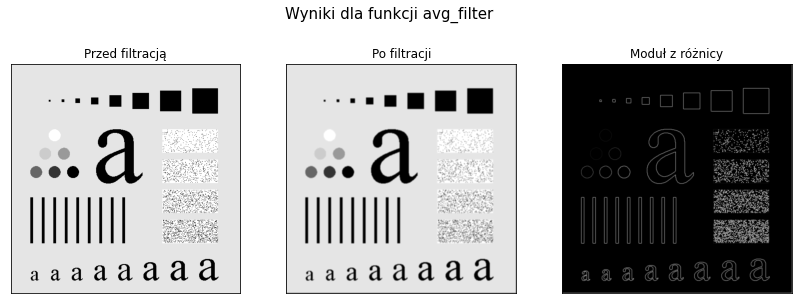

In [23]:
modul_z_roznicy(plansza, K, avg_filter, 'avg_filter')

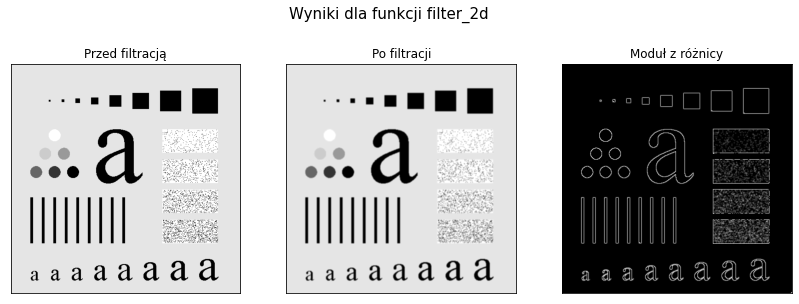

In [24]:
modul_z_roznicy(plansza, K, filter_2d, 'filter_2d')

## Filtracja medianowa

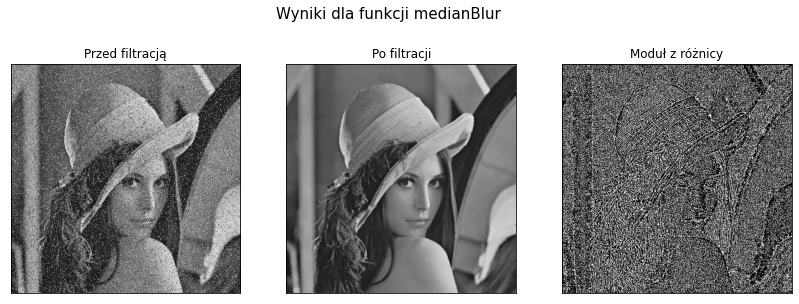

In [25]:
def fun_med(img, kernel):
    return cv2.medianBlur(img, kernel)

modul_z_roznicy(lenaSzum, 3, fun_med, 'medianBlur')

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

## Laplasjan

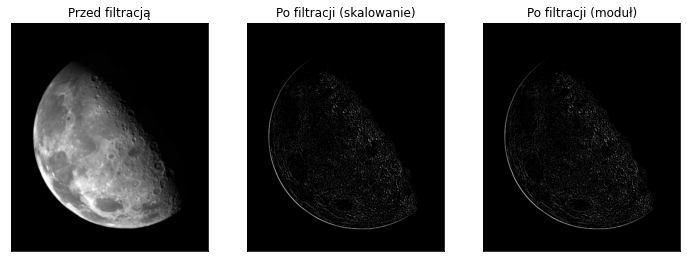

In [26]:
lap_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
lap_norm = (1/9) * lap_mask
moon_lap = filter_2d(moon, lap_norm)

moon_sc = moon_lap + np.full(moon_lap.shape, 128)
moon_sc = moon_sc
moon_abs = np.abs(moon_lap)

fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].imshow(moon, 'gray')
ax[0].set_title('Przed filtracją')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(moon_sc, 'gray')
ax[1].set_title('Po filtracji (skalowanie)')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(moon_abs, 'gray')
ax[2].set_title('Po filtracji (moduł)')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

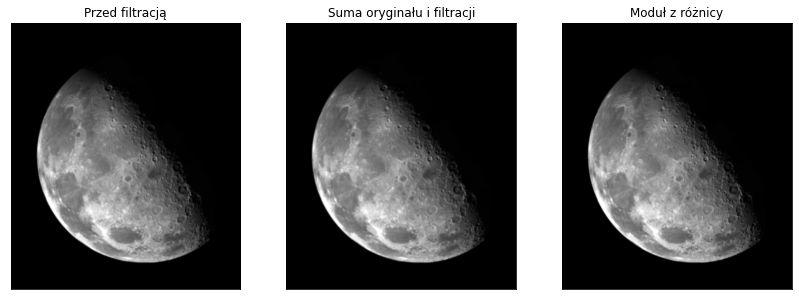

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
ax[0].imshow(moon, 'gray')
ax[0].set_title('Przed filtracją')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow((cv2.add(moon.astype('int16'), moon_lap.astype('int16'))).astype('uint8'), 'gray')
ax[1].set_title('Suma oryginału i filtracji')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(np.abs(moon.astype('int16') - moon_lap.astype('int16').astype('uint8')), 'gray')
ax[2].set_title('Moduł z różnicy')
ax[2].set_xticks([]), ax[2].set_yticks([])

plt.show()

## Gradienty (wykorzystanie pierwszej pochodnej obrazu)

In [28]:
R1 = np.array([[0, 0, 0], [-1, 0, 0], [0, 1, 0]])
R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
P2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


def detect_edges(img, K, title):
    img_norm = (1/9) * K
    img_d = filter_2d(img, img_norm)
    img_sc = img_d + np.full(img_d.shape, 128)
    img_abs = np.abs(img_d)

    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    ax[0].imshow(img, 'gray')
    ax[0].set_title('Przed filtracją')
    ax[0].set_xticks([]), ax[0].set_yticks([])
    ax[1].imshow(img_sc, 'gray')
    ax[1].set_title('Po filtracji (skalowanie)')
    ax[1].set_xticks([]), ax[1].set_yticks([])
    ax[2].imshow(img_abs, 'gray')
    ax[2].set_title('Po filtracji (moduł)')
    ax[2].set_xticks([]), ax[2].set_yticks([])
    plt.suptitle(title)
    plt.show()

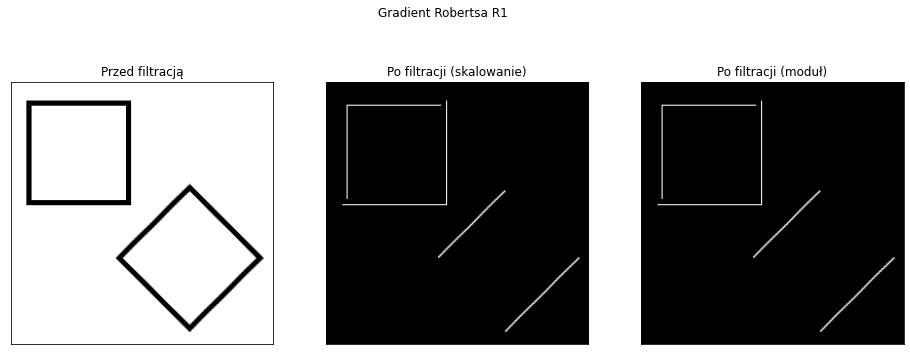

In [29]:
detect_edges(kw, R1, 'Gradient Robertsa R1')

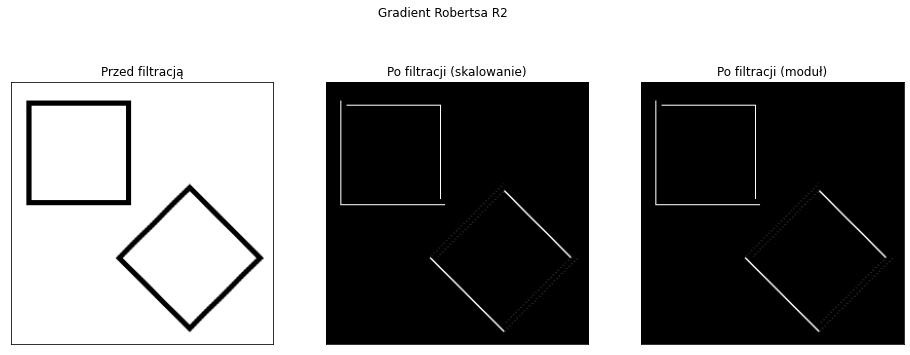

In [30]:
detect_edges(kw, R2, 'Gradient Robertsa R2')

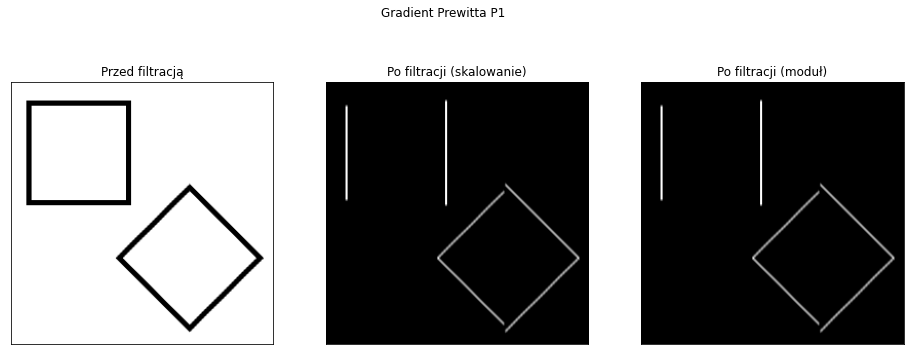

In [31]:
detect_edges(kw, P1, 'Gradient Prewitta P1')

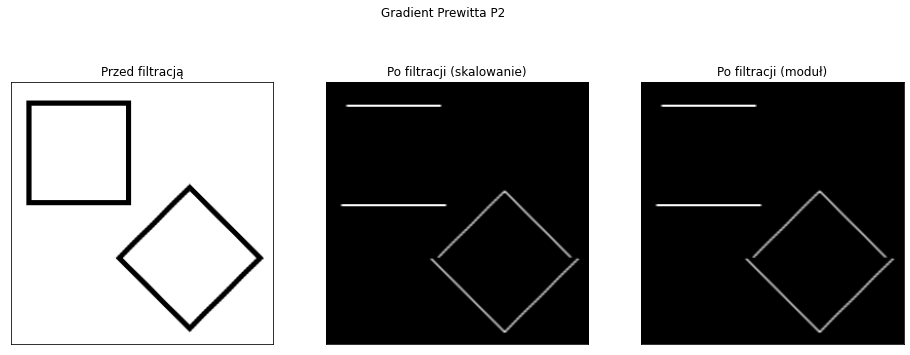

In [32]:
detect_edges(kw, P2, 'Gradient Prewitta P2')

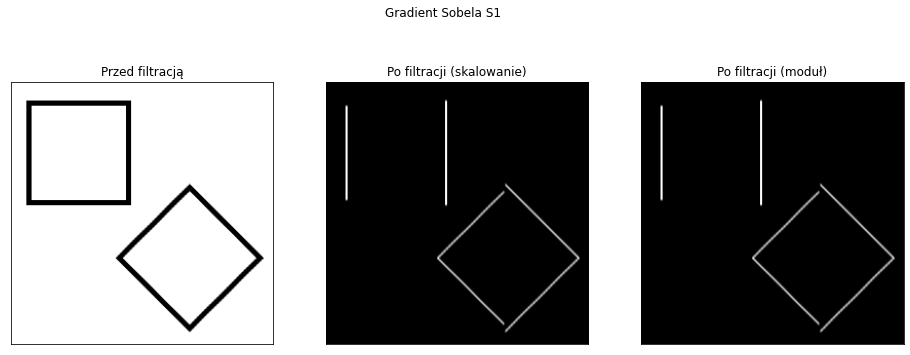

In [33]:
detect_edges(kw, S1, 'Gradient Sobela S1')

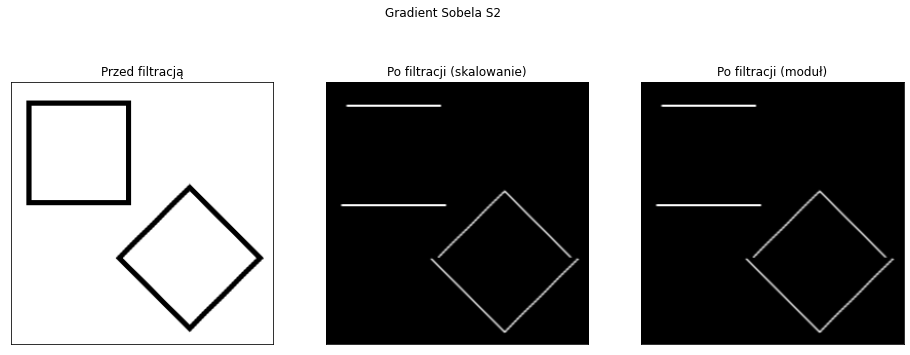

In [34]:
detect_edges(kw, S2, 'Gradient Sobela S2')

## Filtry kombinowane

<ipython-input-35-56e9d535121e>:3: RuntimeWarning: invalid value encountered in sqrt
  OW = np.sqrt((fun(img, k1))**2 + (fun(img, k2))**2)


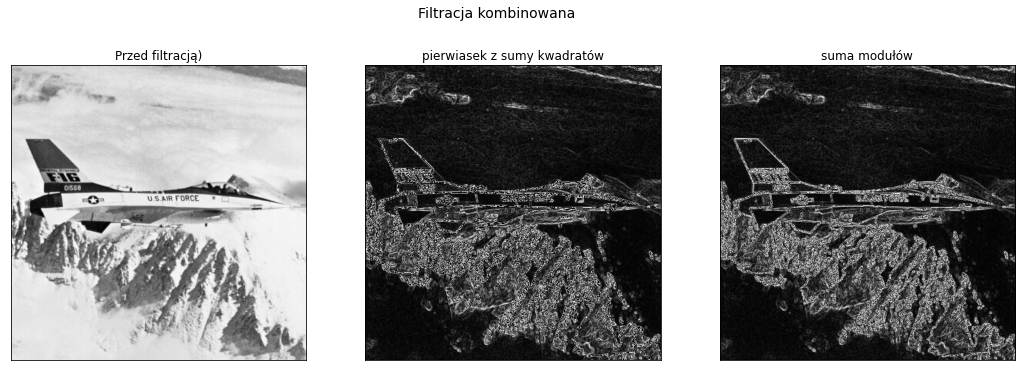

In [35]:
def comb_filter(img, fun, k1, k2):
    img = img.astype('int16')
    OW = np.sqrt((fun(img, k1))**2 + (fun(img, k2))**2)
    return OW.astype('uint8')

def comb_filter_mod(img, fun, k1, k2):
    img = img.astype('int16')
    OW = np.abs(fun(img, k1)) + np.abs(fun(img, k2))
    return OW.astype('uint8')


jet_comb_mod = comb_filter_mod(jet, filter_2d, S1, S2)
jet_comb = comb_filter(jet, filter_2d, S1, S2)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(jet, 'gray')
ax[0].set_title('Przed filtracją)')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(jet_comb, 'gray')
ax[1].set_title('pierwiasek z sumy kwadratów')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(jet_comb_mod, 'gray')
ax[2].set_title('suma modułów')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.suptitle('Filtracja kombinowana', fontsize=14)
plt.show()

## Transformata Fouriera dla obrazów cyfrowych. Filtracja w dziedzinie częstotliwości.

In [39]:
def show_f_img(img, suptitle=None):
    f_img = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift_img = np.fft.fftshift(f_img, [0,1])
    img_mag, img_phase = cv2.cartToPolar(fshift_img[:, :, 0], fshift_img[:, :, 1])
    imgLog = np.log10(img_mag + 1)
    fig, ax = plt.subplots(1, 3, figsize=(14, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Oryginał')
    ax[0].axis('off')
    ax[1].imshow(imgLog, cmap='gray')
    ax[1].set_title('Magnitude')
    ax[1].axis('off')
    ax[2].imshow(img_phase, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Phase')
    if suptitle is not None:
        fig.suptitle(suptitle)
    
def get_fshift_img(img):
    f_img = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    fshift_img = np.fft.fftshift(f_img, [0,1])
    return fshift_img

def ifft(f_img):
    ishift = np.fft.ifftshift(f_img, [0, 1])
    ifft = cv2.idft(ishift, flags=cv2.DFT_SCALE | cv2.DFT_COMPLEX_OUTPUT)
    imgIFFT = cv2.magnitude(ifft[:, :, 0], ifft[:, :, 1])
    img = (np.round(imgIFFT)).astype('uint8')
    return img

In [40]:
def filter_gdp(img, f_type, limit):
    imgSize = img.shape
    FSpaceRows = 2 * np.fft.fftshift(np.fft.fftfreq(imgSize[0]))
    FSpaceRowsM = np.outer(FSpaceRows, np.ones([1, imgSize[1]]))
    FSpaceCols = 2 * np.fft.fftshift(np.fft.fftfreq(imgSize[1]))
    FSpaceColsM = np.outer(np.ones([1, imgSize[0]]), FSpaceCols)
    FreqR = np.sqrt(np.square(FSpaceRowsM) + np.square(FSpaceColsM))
    FilterF = None
    if f_type == "dolno":
        FilterF = FreqR <= limit
    elif f_type == "gorno":
        FilterF = FreqR >= limit
    else:
        FilterF = (FreqR <= limit[1]) & (FreqR >= limit[0])


    figFilter = plt.figure()
    axsFilter = figFilter.add_subplot(projection='3d')
    axsFilter.plot_surface(FSpaceRowsM, FSpaceColsM, FilterF, rstride=1, cstride=1, cmap=plt.get_cmap('gray'), linewidth=0)
    figFilter.show()

    FilterF3 = np.repeat(FilterF[:, :, np.newaxis], 2, axis=2)
    fshift_img = get_fshift_img(img)
    f3_shift_img = np.multiply(fshift_img, FilterF3)

    ishift = np.fft.ifftshift(f3_shift_img, [0, 1])
    ifft = cv2.idft(ishift, flags=cv2.DFT_SCALE | cv2.DFT_COMPLEX_OUTPUT)
    ifft = np.abs(ifft)
    imgIFFT = cv2.magnitude(ifft[:, :, 0], ifft[:, :, 1])
    img_F3 = (np.round(imgIFFT)).astype('uint8')

    plt.figure(figsize=(7, 5))
    plt.imshow(img_F3, cmap='gray')
    plt.axis('off')
    plt.show()

Filtr górnoprzepustowy


<ipython-input-40-65bede7c2303>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figFilter.show()


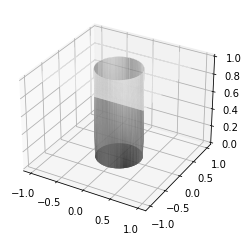

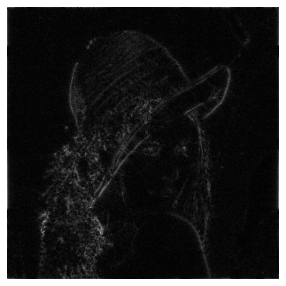

In [41]:
print("Filtr górnoprzepustowy")
filter_gdp(lena, "gorno", 0.4)

Filtr dolnoprzepustowy


<ipython-input-40-65bede7c2303>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figFilter.show()


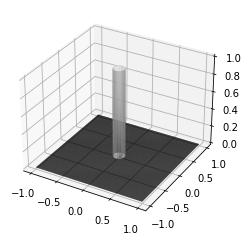

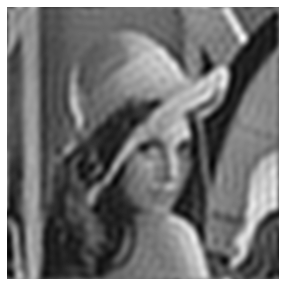

In [42]:
print("Filtr dolnoprzepustowy")
filter_gdp(lena, "dolno", 0.1)

Filtr pasmoprzepustowy


<ipython-input-40-65bede7c2303>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figFilter.show()


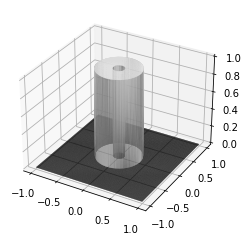

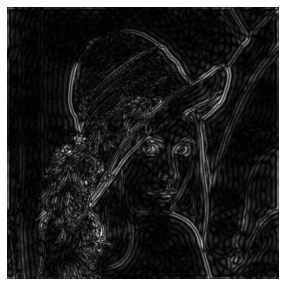

In [43]:
print("Filtr pasmoprzepustowy")
filter_gdp(lena, "pasmo", (0.1, 0.4))

## Wyszukiwanie wzorca za pomocą FFT

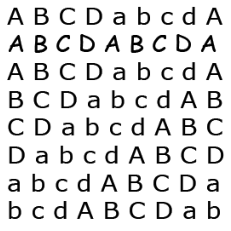

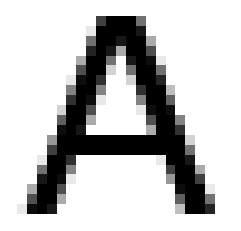

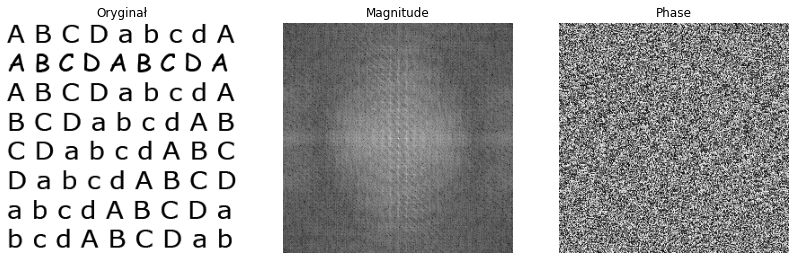

In [44]:
literki = cv2.imread('literki.bmp', cv2.IMREAD_GRAYSCALE)
wzorA = cv2.imread('wzorA.bmp', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(literki, cmap='gray')
plt.axis('off')

plt.figure()
plt.imshow(wzorA, cmap='gray')
plt.axis('off')

show_f_img(literki)

In [45]:
f_literki = cv2.dft(np.float32(literki), flags=cv2.DFT_COMPLEX_OUTPUT)
fshift_literki = np.fft.fftshift(f_literki, [0,1])
Complex_literki = fshift_literki[:, :, 0] + fshift_literki[:, :, 1] * 1j

wzorA_180 = np.rot90(wzorA, 2)
wzorA_new = cv2.copyMakeBorder(wzorA_180, 0, literki.shape[0]-wzorA_180.shape[0], 0, literki.shape[1]-wzorA_180.shape[1], cv2.BORDER_CONSTANT, value=0)
f_wzorA_new = cv2.dft(np.float32(wzorA_new), flags=cv2.DFT_COMPLEX_OUTPUT)
fshift_wzorA_new = np.fft.fftshift(f_wzorA_new, [0,1])
Complex_wzorA_new = fshift_wzorA_new[:, :, 0] + fshift_wzorA_new[:, :, 1] * 1j

Complex = np.multiply(Complex_literki, Complex_wzorA_new)
CompMat = cv2.merge([np.real(Complex), np.imag(Complex)])

Complex_ishift = np.fft.ifftshift(CompMat, [0, 1])
Complex_ifft = cv2.idft(Complex_ishift, flags=cv2.DFT_COMPLEX_INPUT)
Complex_abs = np.abs(Complex_ifft)
Complex_img = cv2.magnitude(Complex_ifft[:, :, 0], Complex_ifft[:, :, 1])

Complex_img = cv2.morphologyEx(Complex_img, cv2.MORPH_TOPHAT, np.ones((3, 3), np.uint8))

(-0.5, 255.5, 255.5, -0.5)

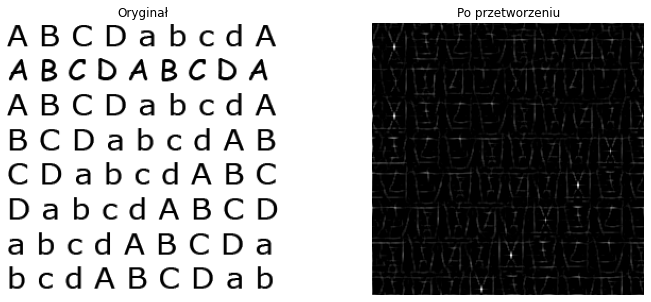

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(literki, cmap='gray')
ax[0].set_title('Oryginał')
ax[0].axis('off')
ax[1].imshow(Complex_img, cmap='gray')
ax[1].set_title('Po przetworzeniu')
ax[1].axis('off')

## Detekcja krawędzi

## Laplasjan z Gaussa

In [1]:
def crossing(LoG, thr, filter_size, median_size):
    result = LoG.copy()
    X, Y = LoG.shape
    area = 3//2
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            win = LoG[i-area: i+area+1, j-area: j+area+1]
            max_val = np.max(win)
            min_val = np.min(win)
            if max_val * min_val < 0:
                if LoG[i, j] > 0:
                    result[i,j] += np.abs(min_val)
                if LoG[i, j] < 0:
                    result[i, j] = np.abs(result[i, j]) + max_val
    result = result.astype('uint8')
    result_thr = result > thr
    result_thr = result_thr.astype(np.int)
    result_thr = result_thr.astype('uint8')
    result_thr_blur = cv2.medianBlur(result_thr, median_size)
    return result_thr_blur
    
def Gauss_Lapl(img, filter_size, thr, sigma=0, median_size=None):
    if median_size is None:
        median_size = filter_size[0]
    img_blur = cv2.GaussianBlur(img, filter_size, sigma)
    img_lapl = cv2.Laplacian(img_blur, cv2.CV_32F)
    filtered_img = crossing(img_lapl, thr, filter_size, median_size)
    return filtered_img

<function matplotlib.pyplot.show(close=None, block=None)>

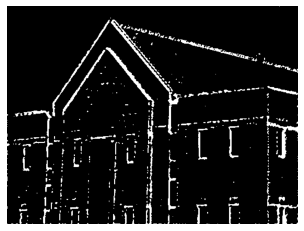

In [4]:
house = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)
filtered_house = Gauss_Lapl(house, (7, 7), 20, 1.2, 3)
plt.figure()
plt.imshow(filtered_house, cmap='gray')
plt.axis('off')
plt.show

## Algorytm Canny'ego

In [5]:
def filter_2d(img, kernel):
    return cv2.filter2D(img, -1, kernel)

def check_direction(mat_deg):
    direction = np.zeros_like(mat_deg)
    for i, row in enumerate(mat_deg):
        for j, elem in enumerate(row):
            if (67.5 <= elem <= 112.5) or (-112.5 <= elem <= -67.5):
                direction[i, j] = 1
            if (-22.5 <= elem <= 22.5) or (157.5 <= elem <= 180) or (-180 <= elem <= -157.5):
                direction[i, j] = 2
            if (112.5 <= elem <= 157.5) or (-67.5 <= elem <= -22.5):
                direction[i, j] = 3
            if (22.5 <= elem <= 67.5) or (-157.5 <= elem <= -112.5):
                direction[i, j] = 4
    return direction


def sobel_filter(img, fun):
    k1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    k2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    img = img.astype('int16')
    gx1 = fun(img, k1)
    gx2 = fun(img, k2)
    OW = np.sqrt((gx1)**2 + (gx2)**2)
    angle = np.arctan2(gx2, gx1)
    return OW.astype('uint8'), angle

def nonmax(win_ampl, win_angle):
    size = win_angle.shape[0]//2
    central_pix_dir = win_angle[size, size]
    central_pix_ampl = win_ampl[size, size]
    for i in range(win_angle.shape[0]):
        for j in range(win_angle.shape[1]):
            if win_angle[i, j] == central_pix_dir and win_ampl[i, j] > central_pix_ampl:
                return 0
    return win_ampl[i, j]

def CannyAlgorithm(img, filter_size, sigma, TL, TH):
    img_blur = cv2.GaussianBlur(img, filter_size, sigma)
    img_ampl, img_angle_rad = sobel_filter(img_blur, filter_2d)
    img_angle_deg = np.degrees(img_angle_rad)
    dir_mat = check_direction(img_angle_deg)
    X, Y = img.shape
    area = 3//2
    g_N = np.zeros_like(img)
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            win_ampl = img_ampl[i-area: i+area+1, j-area: j+area+1]
            win_angle = dir_mat[i-area: i+area+1, j-area: j+area+1]
            g_N[i, j] = nonmax(win_ampl, win_angle)
    g_NH = g_N >= TH
    g_NL = (TH > g_N) & (g_N >= TL)
    
    g_NH = g_NH.astype(np.int)
    g_NH = g_NH.astype('uint8')
    
    g_NL = g_NL.astype(np.int)
    g_NL = g_NL.astype('uint8')
    
    compound = np.zeros_like(g_N)
    compound = np.repeat(compound[:, :, np.newaxis], 3, axis=2)
    compound[:, :, 0] = np.where(g_NH == 1, 255, 0)
    compound[:, :, 2] = np.where(g_NL == 1, 255, 0)
    gray_compound = cv2.cvtColor(compound, cv2.COLOR_RGB2GRAY)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 12))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Oryginał')
    ax[0].axis('off')
    
    ax[1].imshow(gray_compound, cmap='gray')
    ax[1].set_title('Złożenie')
    ax[1].axis('off')
    
    ax[2].imshow(compound)
    ax[2].set_title('Red and Green')
    ax[2].axis('off')
    
    return gray_compound

<ipython-input-5-d7934cf49d6e>:25: RuntimeWarning: invalid value encountered in sqrt
  OW = np.sqrt((gx1)**2 + (gx2)**2)


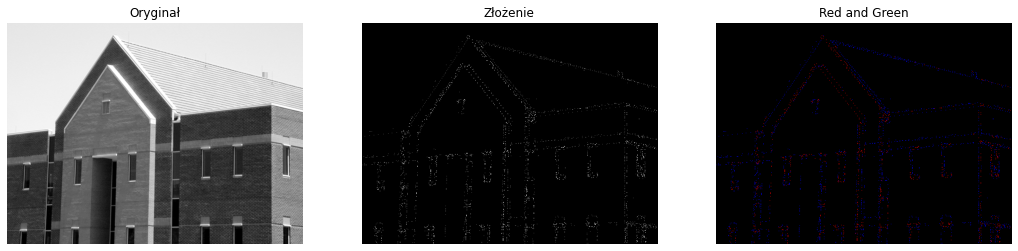

In [6]:
house_Canny_alg = CannyAlgorithm(house, (5, 5), 1.5, 50, 100)

(-0.5, 556.5, 416.5, -0.5)

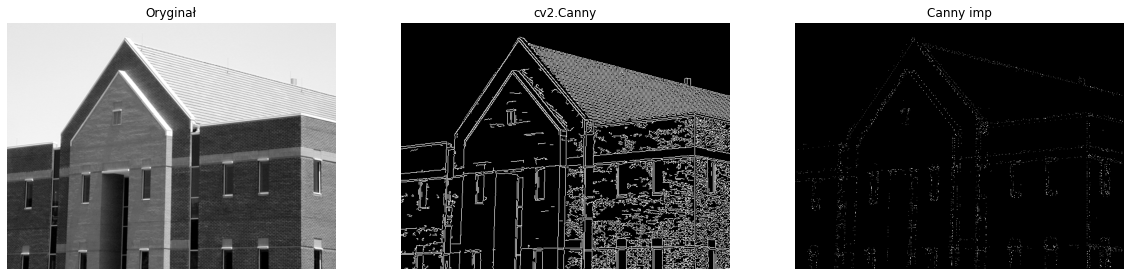

In [8]:
house_edges = cv2.Canny(house, 50, 100, None, 3, 1)

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(house, cmap='gray')
ax[0].set_title('Oryginał')
ax[0].axis('off')

ax[1].imshow(house_edges, cmap='gray')
ax[1].set_title('cv2.Canny')
ax[1].axis('off')

ax[2].imshow(house_Canny_alg, cmap='gray')
ax[2].set_title('Canny imp')
ax[2].axis('off')

## Morphology

In [11]:
buzka = cv2.imread('buzka.bmp', cv2.IMREAD_GRAYSCALE)
calculator = cv2.imread('calculator.bmp', cv2.IMREAD_GRAYSCALE)
ertka = cv2.imread('ertka.bmp', cv2.IMREAD_GRAYSCALE)
ferrari = cv2.imread('ferrari.bmp', cv2.IMREAD_GRAYSCALE)
fingerprint = cv2.imread('fingerprint.bmp', cv2.IMREAD_GRAYSCALE)
hom = cv2.imread('hom.bmp', cv2.IMREAD_GRAYSCALE)
kolka = cv2.imread('kolka.bmp', cv2.IMREAD_GRAYSCALE)
kosc = cv2.imread('kosc.bmp', cv2.IMREAD_GRAYSCALE)
szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)
text = cv2.imread('text.bmp', cv2.IMREAD_GRAYSCALE)
wyspa = cv2.imread('wyspa.bmp', cv2.IMREAD_GRAYSCALE)
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

In [12]:
def all_morph_oper(img):
    struct_obj = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_dilate = cv2.dilate(img, struct_obj)
    img_erode = cv2.erode(img, struct_obj)
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct_obj)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, struct_obj)
    fig, ax = plt.subplots(1, 5, figsize=(21, 4))
    ax[0].imshow(img, cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Oryginał')
    ax[1].imshow(img_dilate, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title('Po dylatacji')
    ax[2].imshow(img_erode, cmap='gray')
    ax[2].axis('off')
    ax[2].set_title('Po erozji')
    ax[3].imshow(img_open, cmap='gray')
    ax[3].axis('off')
    ax[3].set_title('Po otwarciu')
    ax[4].imshow(img_close, cmap='gray')
    ax[4].axis('off')
    ax[4].set_title('Po zamknięciu')
    fig.suptitle('Element strukturalny (kwadrat)', fontsize=14)

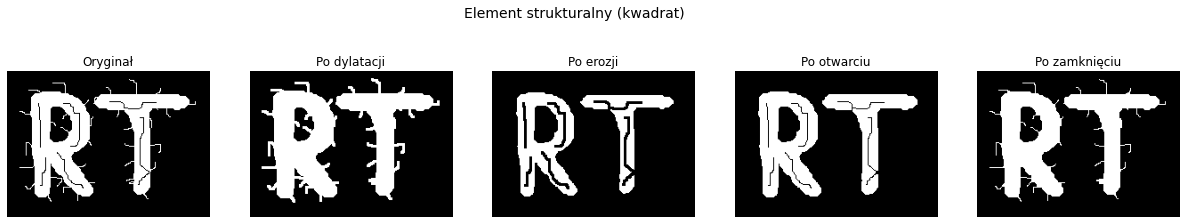

In [13]:
all_morph_oper(ertka)

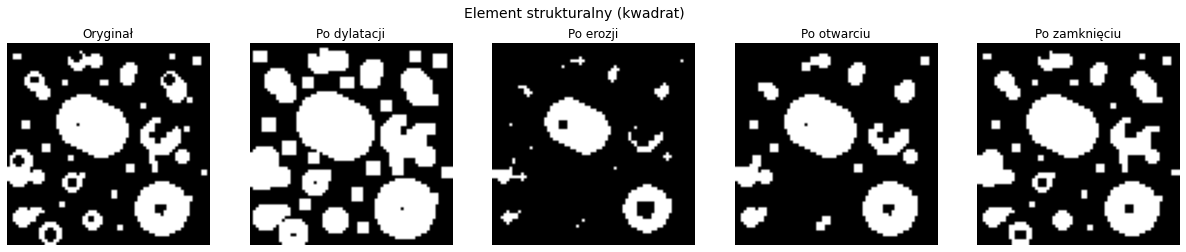

In [14]:
all_morph_oper(kolka)

Text(0.5, 1.0, 'Po operacji otwarcia i zamknięcia')

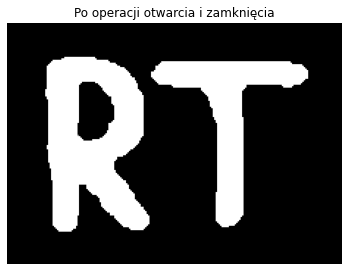

In [15]:
ertka_open = cv2.morphologyEx(ertka, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
ertka_close_open = cv2.morphologyEx(ertka_open, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))

plt.figure(figsize = (6, 5))
plt.imshow(ertka_close_open, cmap='gray')
plt.axis('off')
plt.title('Po operacji otwarcia i zamknięcia')

## Transformacja trafił, nie trafił

(-0.5, 44.5, 27.5, -0.5)

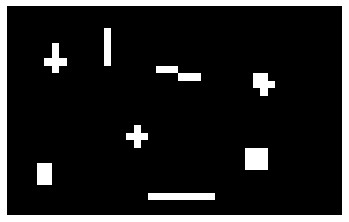

In [16]:
plt.figure(figsize = (6, 5))
plt.imshow(hom, cmap='gray')
plt.axis('off')

(-0.5, 44.5, 27.5, -0.5)

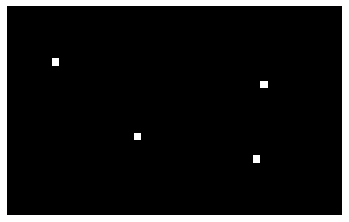

In [17]:
struct_elem = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

hom_hitmiss = cv2.morphologyEx(hom, cv2.MORPH_HITMISS, struct_elem)

plt.figure(figsize = (6, 5))
plt.imshow(hom_hitmiss, cmap='gray')
plt.axis('off')

## Operacje morfologiczne na rzeczywistym obrazie

Text(0.5, 1.0, 'Gradient morfologiczny')

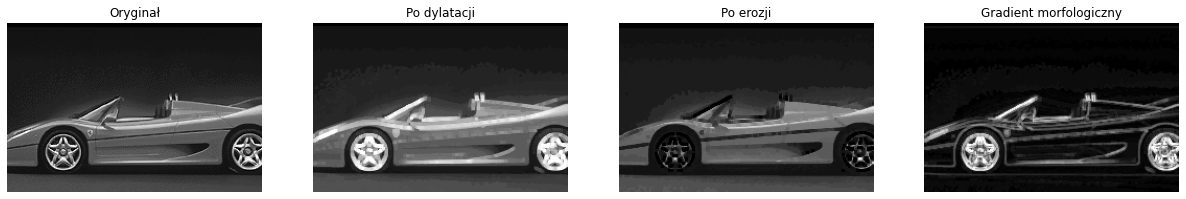

In [18]:
struct_obj = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
ferrari_dilate = cv2.dilate(ferrari, struct_obj)
ferrari_erode = cv2.erode(ferrari, struct_obj)
ferrari_morph_grad = ferrari_dilate - ferrari_erode

fig, ax = plt.subplots(1, 4, figsize=(21, 4))
ax[0].imshow(ferrari, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Oryginał')
ax[1].imshow(ferrari_dilate, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Po dylatacji')
ax[2].imshow(ferrari_erode, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Po erozji')
ax[3].imshow(ferrari_morph_grad, cmap='gray')
ax[3].axis('off')
ax[3].set_title('Gradient morfologiczny')

Text(0.5, 1.0, 'Po otwarciu')

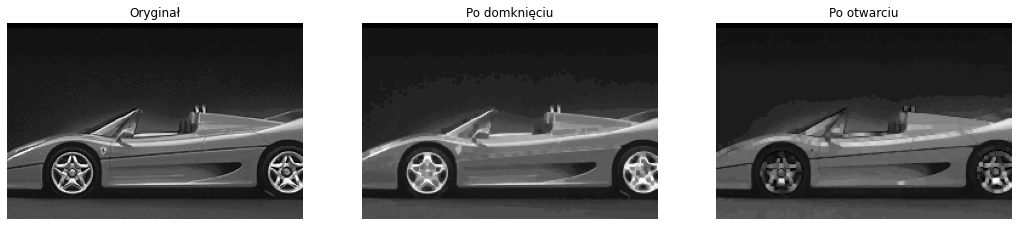

In [19]:
struct_obj = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
ferrari_open = cv2.morphologyEx(ferrari, cv2.MORPH_OPEN, struct_obj)
ferrari_close = cv2.morphologyEx(ferrari, cv2.MORPH_CLOSE, struct_obj)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].imshow(ferrari, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Oryginał')
ax[1].imshow(ferrari_close, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Po domknięciu')
ax[2].imshow(ferrari_open, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Po otwarciu')

Text(0.5, 1.0, 'bottom-hat')

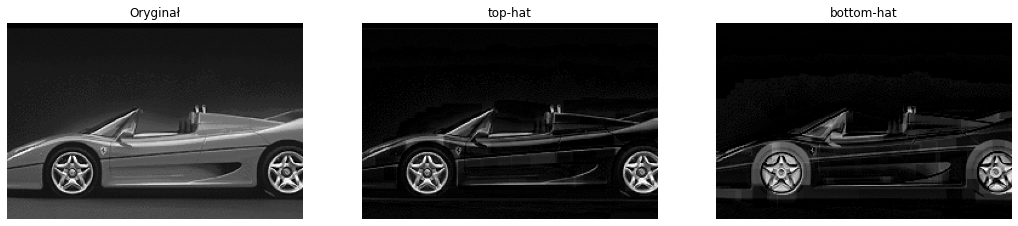

In [20]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
ferrari_tophat = cv2.morphologyEx(ferrari, cv2.MORPH_TOPHAT, strel) 
ferrari_bottom_hat = cv2.morphologyEx(ferrari, cv2.MORPH_BLACKHAT, strel)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].imshow(ferrari, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Oryginał')
ax[1].imshow(ferrari_tophat, cmap='gray')
ax[1].axis('off')
ax[1].set_title('top-hat')
ax[2].imshow(ferrari_bottom_hat, cmap='gray')
ax[2].axis('off')
ax[2].set_title('bottom-hat')

## Transformacja Hough'a 

In [25]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

def filter_2d(img, kernel):
    return cv2.filter2D(img, -1, kernel)

def sobel_filter(img, fun):
    k1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    k2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    img = img.astype('int16')
    gx1 = fun(img, k1)
    gx2 = fun(img, k2)
    OW = np.abs(gx1) + np.abs(gx2)
    angle = np.arctan2(gx2, gx1)
    return OW.astype('uint8')

def show_hough2(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(h, cmap='gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    ax[1].set_aspect(0.25)

    plt.tight_layout()
    plt.show()  

In [26]:
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
kwadraty_o = cv2.imread('kwadraty.png')
lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
lab112_o = cv2.imread('lab112.png')
dom = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)
dom_o = cv2.imread('dom.png')

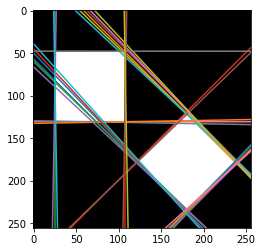

In [28]:
kwadraty_sobel = sobel_filter(kwadraty, filter_2d)
lines = cv2.HoughLines(kwadraty_sobel, 1, np.pi/180, 84)
plt.figure()
for i in range(len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    plt.plot((x1, x2), (y1, y2))
    
plt.imshow(kwadraty_o)

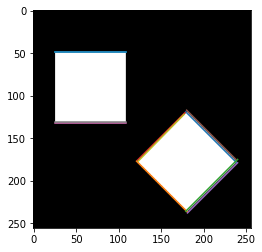

In [29]:
linesP = cv2.HoughLinesP(kwadraty_sobel, 1, np.pi/180, 84)
plt.figure()
for i in range(len(linesP)):
    coord = linesP[i][0]
    plt.plot((coord[0], coord[2]), (coord[1], coord[3]))
plt.imshow(kwadraty_o)

## Transformacja Hough'a dla rzeczywistego obrazu

(-0.5, 639.5, 479.5, -0.5)

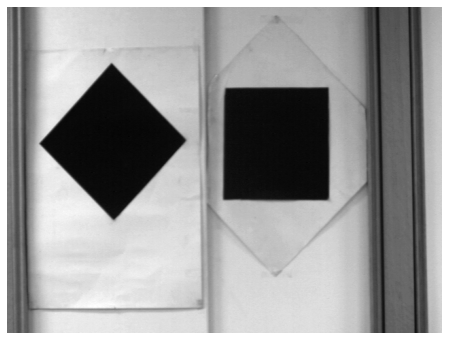

In [30]:
plt.figure(figsize=(9, 6))
plt.imshow(lab112, cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Obraz po filtracji uśredniającej')

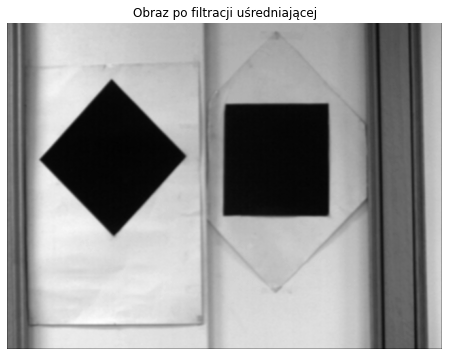

In [31]:
def avg_filter(img, kernel):
    return signal.convolve2d(img, kernel, mode='same')
make_K = lambda n: (1/(n**2)) * np.ones((n, n))

lab112_conv = avg_filter(lab112, make_K(3))
plt.figure(figsize=(9, 6))
plt.imshow(lab112_conv, cmap='gray')
plt.axis('off')
plt.title('Obraz po filtracji uśredniającej')

Text(0.5, 1.0, 'Uśrednienie + Canny + dylatacja')

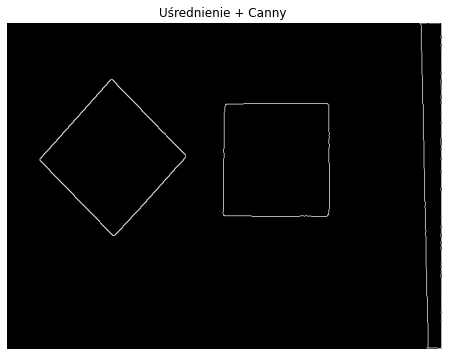

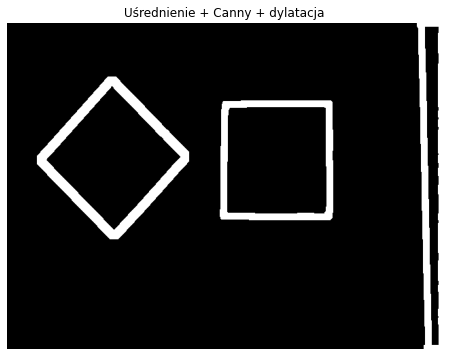

In [32]:
lab112_edges_1 = cv2.Canny(lab112_conv.astype('uint8'), 110, 250, None, 3, 1)
plt.figure(figsize=(9, 6))
plt.imshow(lab112_edges_1, cmap='gray')
plt.axis('off')
plt.title("Uśrednienie + Canny ")

struct_obj = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
lab112_dilate = cv2.dilate(lab112_edges_1, struct_obj)
plt.figure(figsize=(9, 6))
plt.imshow(lab112_dilate , cmap='gray')
plt.axis('off')
plt.title("Uśrednienie + Canny + dylatacja")

Text(0.5, 1.0, 'Detekcja Canny z oryginału')

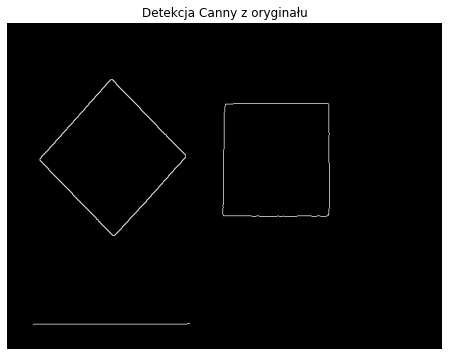

In [33]:
lab112_edges_2 = cv2.Canny(lab112, 110, 250, None, 3, 1)
plt.figure(figsize=(9, 6))
plt.imshow(lab112_edges_2, cmap='gray')
plt.axis('off')
plt.title("Detekcja Canny z oryginału")

Text(0.5, 1.0, 'Część wspólna lab112_dilate i lab112_edges_2')

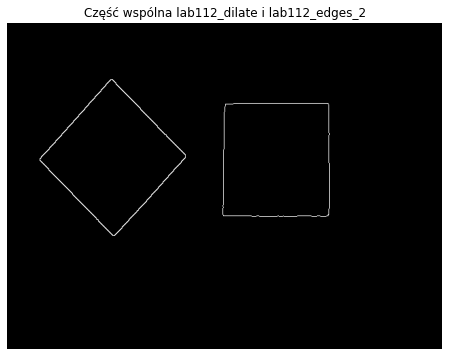

In [34]:
lab112_oe = cv2.bitwise_and(lab112_dilate, lab112_edges_2)
plt.figure(figsize=(9, 6))
plt.imshow(lab112_oe , cmap='gray')
plt.axis('off')
plt.title("Część wspólna lab112_dilate i lab112_edges_2")

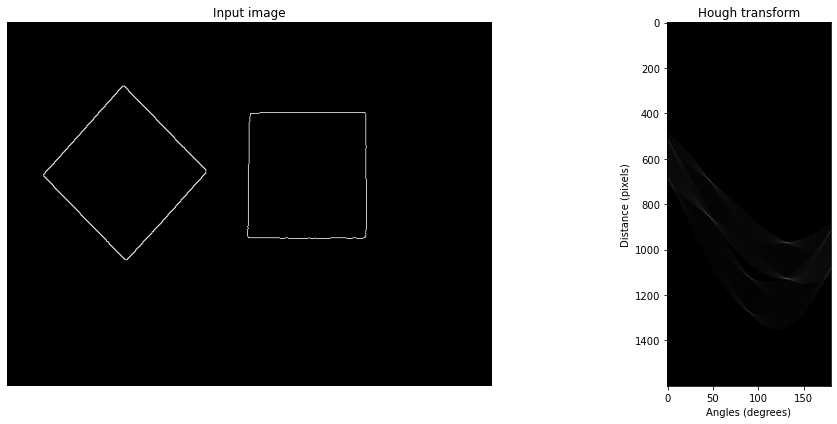

(array([144, 137, 131, 130, 127, 114, 112,  98], dtype=uint64), array([ 1.57079633, -0.76345967, -0.76345967,  0.72835807,  0.0087754 ,
        0.72835807, -0.0087754 , -1.55324553]), array([ 119.57473421,   54.5340838 , -104.56535335,  327.70481551,
        320.70043777,  169.60600375,  472.79549719, -277.67354597]))

liczba maksimów =  8


[(144, 1.5707963267948966, 119.5747342088805), (137, -0.763459667213162, 54.53408380237647), (131, -0.763459667213162, -104.56535334584123), (130, 0.7283580733183039, 327.7048155096934), (127, 0.008775398473714446, 320.7004377736084), (114, 0.7283580733183039, 169.60600375234515), (112, -0.008775398473714668, 472.79549718574094), (98, -1.5532455298474674, -277.67354596622897)]


In [35]:
lab112_H, lab112_th, lab112_rho = hough_line(lab112_oe)
show_hough2(lab112_H, lab112_oe)
lab112_H_peaks = hough_line_peaks(lab112_H, lab112_th, lab112_rho)

print(lab112_H_peaks)
print("\nliczba maksimów = ", len(lab112_H_peaks[0]))
print("\n")
peaks_coord = list(zip(*lab112_H_peaks))
print(peaks_coord)

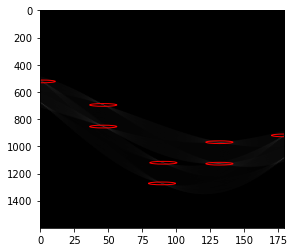

In [36]:
fig,ax = plt.subplots(1)
peaks_coord_sc = []
for acc, x, y in peaks_coord:
    x = np.degrees(x + np.pi/2)
    y = y + lab112_H.shape[0]/2
    peaks_coord_sc.append((x, y))
    
for x, y in peaks_coord_sc:
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)
ax.imshow(lab112_H, 'gray') 
ax.set_aspect(0.1)

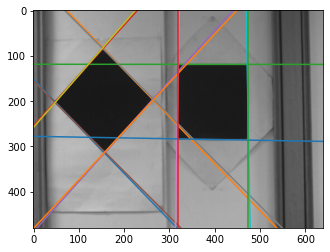

In [37]:
lines = cv2.HoughLines(lab112_oe, 1, np.pi/180, 84)
plt.figure()
for i in range(len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    plt.plot((x1, x2), (y1, y2))
    
plt.imshow(lab112_o)

## Segmentacja

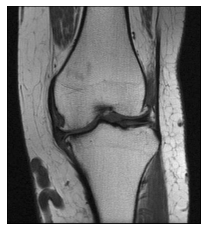

In [38]:
knee = cv2.imread('knee.png', cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(knee, cmap='gray')
plt.axis('off')

coord = (191, 345)

In [39]:
def seg_region_growing(img, seed, threshold=4, use_Gauss_filter=False, Gauss_size=3, sigma=0):
    img = img.copy()
    if use_Gauss_filter:
        img = cv2.GaussianBlur(img, (Gauss_size, Gauss_size), sigma)
    X, Y = img.shape
    visited = np.full((X, Y), False)
    segmented = np.zeros((X, Y))
    
    stack = [seed]
    visited[seed] = True
    segmented[seed] = 1
    
    while stack:
        x, y = stack.pop()
        
        if 0 < x < X-1 and 0 < y < Y - 1:
            for i in range(x - 1, x + 2):
                for j in range(y - 1, y + 2):
                    dist = np.abs(int(img[x, y]) - int(img[i, j]))
                    
                    if dist < threshold and visited[i, j] == False:
                        segmented[i, j] = 1
                        stack.append((i, j))
                        
                    visited[i, j] = True
                    
    return segmented.astype('uint8')

Text(0.5, 1.0, 'threshold=6')

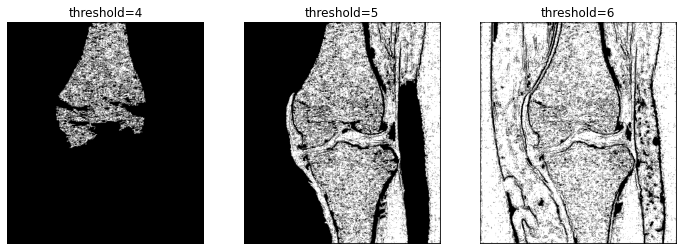

In [40]:
knee_seg = seg_region_growing(knee, coord)
knee_seg_5 = seg_region_growing(knee, coord, 5)
knee_seg_6 = seg_region_growing(knee, coord, 6)

fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].imshow(knee_seg, cmap='gray')
ax[0].axis('off')
ax[0].set_title('threshold=4')

ax[1].imshow(knee_seg_5, cmap='gray')
ax[1].axis('off')
ax[1].set_title('threshold=5')

ax[2].imshow(knee_seg_6, cmap='gray')
ax[2].axis('off')
ax[2].set_title('threshold=6')

In [41]:
def seg_region_growing_global(img, seed, threshold=25, use_Gauss_filter=False, Gauss_size=3, sigma=0):
    img = img.copy()
    if use_Gauss_filter:
        img = cv2.GaussianBlur(img, (Gauss_size, Gauss_size), sigma)
    X, Y = img.shape
    visited = np.full((X, Y), False)
    segmented = np.zeros((X, Y))
    
    stack = [seed]
    visited[seed] = True
    segmented[seed] = 1
    
    mV = 0
    nS = 0
    
    while stack:
        x, y = stack.pop()
        
        nS += 1
        mV = (mV * (nS - 1) + img[x, y]) / nS
        
        if 0 < x < X-1 and 0 < y < Y - 1:
            for i in range(x - 1, x + 2):
                for j in range(y - 1, y + 2):
                    
                    dist = np.abs(mV - int(img[i, j]))
                    
                    if dist < threshold and visited[i, j] == False:
                        segmented[i, j] = 1
                        stack.append((i, j))
                        
                    visited[i, j] = True
                    
    return segmented.astype('uint8')

Text(0.5, 1.0, 'threshold=45')

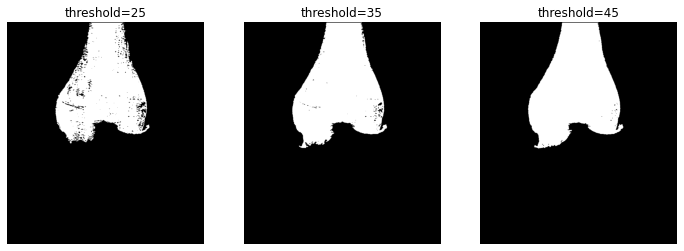

In [42]:
knee_segg_25 = seg_region_growing_global(knee, coord, 25)
knee_segg_30 = seg_region_growing_global(knee, coord, 35)
knee_segg_45 = seg_region_growing_global(knee, coord, 45)

fig, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].imshow(knee_segg_25, cmap='gray')
ax[0].axis('off')
ax[0].set_title('threshold=25')

ax[1].imshow(knee_segg_30, cmap='gray')
ax[1].axis('off')
ax[1].set_title('threshold=35')

ax[2].imshow(knee_segg_45, cmap='gray')
ax[2].axis('off')
ax[2].set_title('threshold=45')

In [43]:
knee_seg_gauss = seg_region_growing(knee, coord, 3, True, 5, 0)
knee_segg_45_gauss = seg_region_growing_global(knee, coord, 45, True, 5, 1)

Text(0.5, 1.0, 'seg_region_growing_global + Gauss,\n threshold=45')

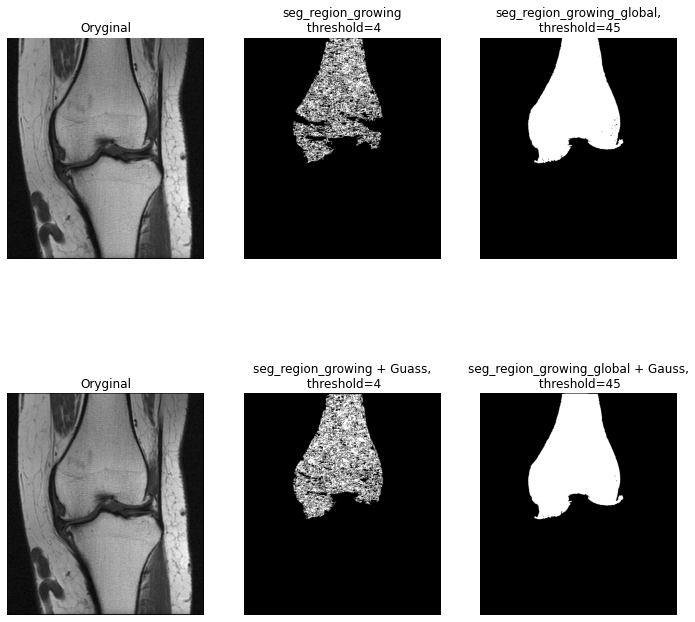

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(12, 12))
ax[0][0].imshow(knee, cmap='gray')
ax[0][0].axis('off')
ax[0][0].set_title('Oryginal')

ax[0][1].imshow(knee_seg, cmap='gray')
ax[0][1].axis('off')
ax[0][1].set_title('seg_region_growing\n threshold=4')

ax[0][2].imshow(knee_segg_45, cmap='gray')
ax[0][2].axis('off')
ax[0][2].set_title('seg_region_growing_global,\n threshold=45')

ax[1][0].imshow(knee, cmap='gray')
ax[1][0].axis('off')
ax[1][0].set_title('Oryginal')

ax[1][1].imshow(knee_seg_gauss, cmap='gray')
ax[1][1].axis('off')
ax[1][1].set_title('seg_region_growing + Guass,\n threshold=4')

ax[1][2].imshow(knee_segg_45_gauss, cmap='gray')
ax[1][2].axis('off')
ax[1][2].set_title('seg_region_growing_global + Gauss,\n threshold=45')

## Indeksacja i klasyfikacja obiektów

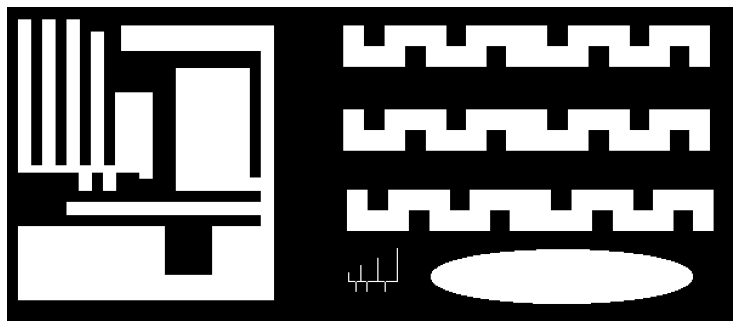

In [45]:
ccl1 = cv2.imread('ccl1.png', cv2.IMREAD_GRAYSCALE)
shapes = cv2.imread('shapes.png', cv2.IMREAD_GRAYSCALE)
shapesReal = cv2.imread('shapesReal.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(13, 6))
plt.imshow(ccl1, cmap='gray')
plt.axis('off')
plt.show()

In [46]:
def first_pass(img):
    img = img.copy()
    X, Y = img.shape
    L = 1
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            if img[i, j] != 0:
                ABCD = img[i - 1, j - 1 : j + 2]
                ABCD = np.append(ABCD, img[i, j - 1])
                if np.all(ABCD == 0):
                    img[i, j] = L
                    L += 1
                else:
                    mask = (ABCD != 0)
                    L_min = np.min(ABCD[mask])
                    L_max = np.max(ABCD[mask])
                    if L_min == L_max:
                        img[i, j] = L_min
                    
                    else:
                        img[i, j] = L_min
    return img

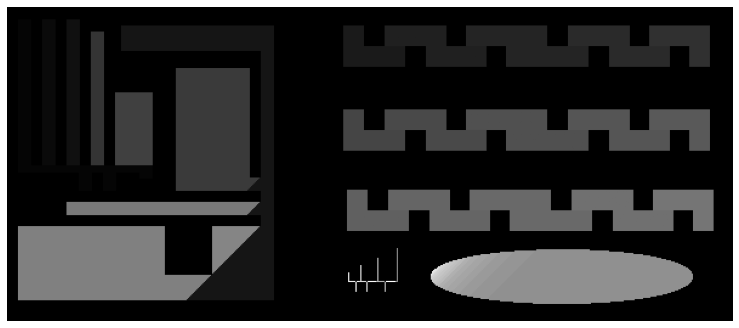

In [47]:
f_step = first_pass(ccl1)
plt.figure(figsize=(13, 6))
plt.imshow(f_step, cmap='gray')
plt.axis('off')
plt.show()

In [48]:
def root(idx, tab):
    if tab[idx] == idx:
        return idx
    return root(tab[idx], tab)

def union(p, q, tab):
    root_p = root(p, tab)
    root_q = root(q, tab)
    if root_p != root_q:
        if p < q:
            tab[root_p] = root_q
        else:
            tab[root_q] = root_p

def first_pass_uf(img, tab):
    img = img.copy()
    X, Y = img.shape
    L = 1
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            if img[i, j] != 0:
                ABCD = img[i - 1, j - 1 : j + 2]
                ABCD = np.append(ABCD, img[i, j - 1])
                if np.all(ABCD == 0):
                    img[i, j] = L
                    L += 1
                else:
                    mask = (ABCD != 0)
                    L_min = np.min(ABCD[mask])
                    L_max = np.max(ABCD[mask])
                    if L_min == L_max:
                        img[i, j] = L_min
                    else:
                        union(L_min, L_max, tab)
                        img[i, j] = L_min
    return img

def LUT_recoding(img, lut_tab):
    img = img.copy()
    X, Y = img.shape
    for i in range(1, X - 1):
        for j in range(1, Y - 1):
            if img[i, j] > 0:
                img[i, j] = root(img[i, j], lut_tab)
    return img.astype('uint8')

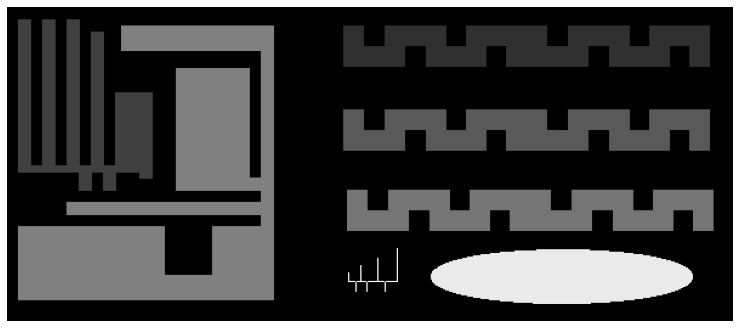

In [49]:
N = 100
id = np.arange(0, N)

f_step = first_pass_uf(ccl1, id)
s_step = LUT_recoding(f_step, id)

plt.figure(figsize=(13, 6))
plt.imshow(s_step, cmap='gray')
plt.axis('off')
plt.show()

### OpenCV indexing

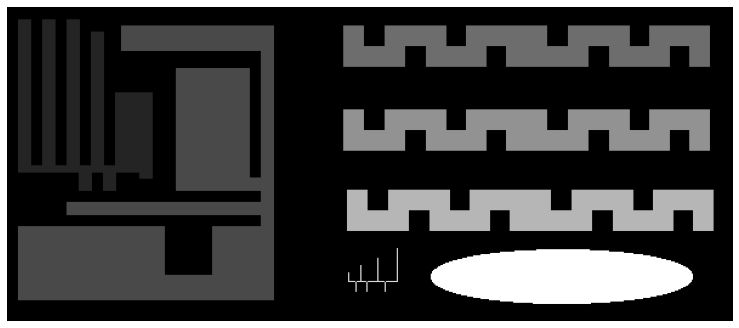

In [50]:
retval, ccl1_cv = cv2.connectedComponents(ccl1)
plt.figure(figsize=(13, 6))
plt.imshow(ccl1_cv, cmap='gray')
plt.axis('off')
plt.show()

## Rozpoznawanie obiektów z wykorzystaniem współczynników kształtu

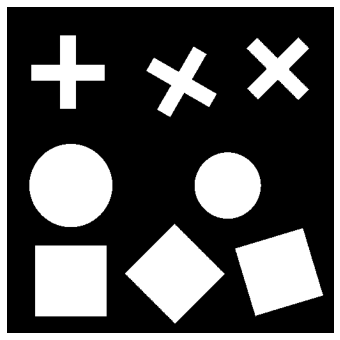

In [51]:
plt.figure(figsize=(13, 6))
plt.imshow(shapes, cmap='gray')
plt.axis('off')
plt.show()

In [52]:
obj = []
moments = []
moments_HU = []
retval, shapes_cv = cv2.connectedComponents(shapes)
for s in range(1, retval):
    obj.append(((shapes_cv == s).astype(np.int)).astype('uint8'))
    moments.append(cv2.moments(obj[s - 1]))
    moments_HU.append(cv2.HuMoments(moments[s - 1]))

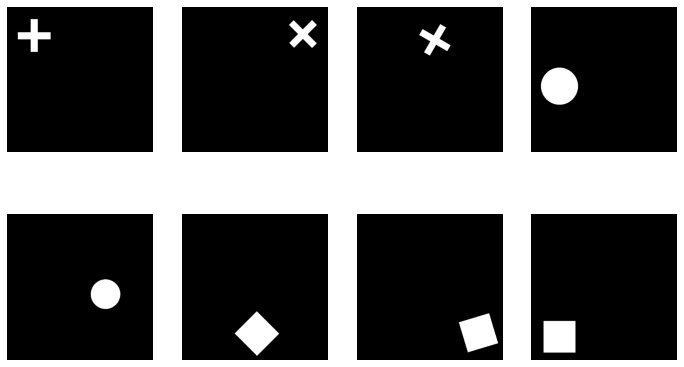

In [53]:
fig, ax = plt.subplots(2, 4, figsize=(12, 7))
k = 0
for i in range(2):
    for j in range(4):
        ax[i][j].imshow(obj[k], cmap='gray')
        ax[i][j].axis('off')
        k += 1

In [54]:
for j in range(7):
    print(f"I{j}:", end=' ')
    for i in range(len(moments_HU)):
        print(moments_HU[i][j], end='\t ')
    print()

I0: [0.25020391]	 [0.25794909]	 [0.25705906]	 [0.15915482]	 [0.15915587]	 [0.16669218]	 [0.16671843]	 [0.16665996]	 
I1: [2.3092849e-09]	 [1.08977954e-06]	 [1.5026187e-07]	 [3.16293019e-08]	 [1.30608986e-07]	 [2.37382411e-06]	 [1.5005425e-06]	 [2.23442217e-06]	 
I2: [2.31959783e-05]	 [2.86216549e-05]	 [2.73926132e-05]	 [8.22063073e-10]	 [9.50757712e-09]	 [6.35596477e-10]	 [2.85079199e-09]	 [0.]	 
I3: [1.47326898e-06]	 [1.77622893e-06]	 [1.73732679e-06]	 [7.36340232e-14]	 [3.34678824e-13]	 [5.31257419e-11]	 [1.86840551e-10]	 [0.]	 
I4: [8.61250351e-12]	 [1.26306067e-11]	 [1.19840998e-11]	 [-3.49346145e-25]	 [-1.33716847e-24]	 [4.01564382e-21]	 [1.08808452e-19]	 [0.]	 
I5: [7.07979694e-11]	 [-1.85400651e-09]	 [-6.73378794e-10]	 [1.15762233e-17]	 [-5.8288278e-17]	 [-5.9978146e-14]	 [-6.24180205e-15]	 [0.]	 
I6: [1.1824786e-24]	 [9.29001241e-13]	 [-1.49054457e-13]	 [4.54047242e-25]	 [1.88315114e-23]	 [-8.89805573e-21]	 [8.2188703e-20]	 [0.]	 


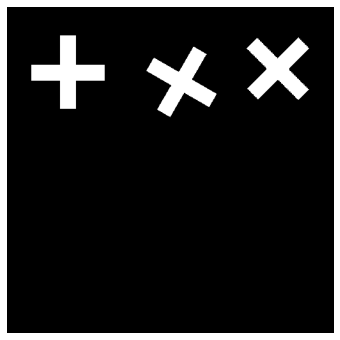

In [55]:
def recognize_obj(img, ths):
    result = np.zeros_like(img)
    retval, img_cv = cv2.connectedComponents(img)
    for s in range(1, retval):
        obj = ((img_cv == s).astype(np.int)).astype('uint8')
        mom = cv2.moments(obj)
        mom_HU = cv2.HuMoments(mom)
        for idx, th in enumerate(ths):
            if mom_HU[idx][0] > th:
                result += obj
    return result

selected_s = recognize_obj(shapes, [0.2])

plt.figure(figsize=(13, 6))
plt.imshow(selected_s, cmap='gray')
plt.axis('off')
plt.show()

## Rozpoznawanie obiektów z wykorzystaniem współczynników kształtu (obraz rzeczywisty)

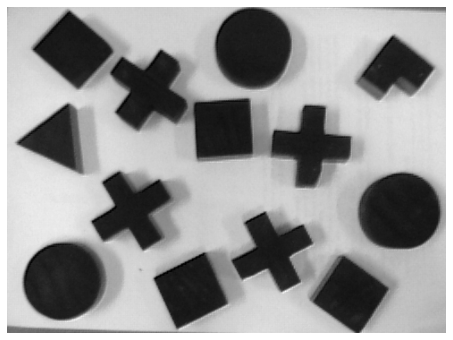

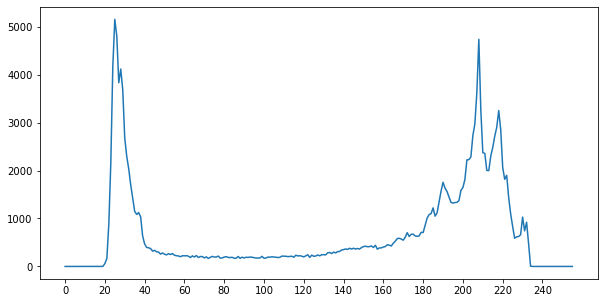

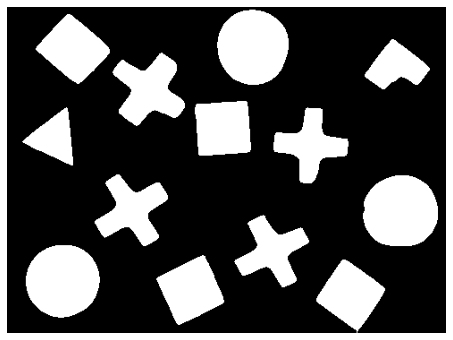

In [56]:
def plot_img_hist(chart):
    chart_hist = cv2.calcHist([chart], [0], None, [256], [0, 256])
    fig = plt.figure(figsize=(10, 5))
    plt.plot(chart_hist)
    plt.xticks(np.arange(0, 256, 20.0))
    return fig

plt.figure(figsize=(13, 6))
plt.imshow(shapesReal, cmap='gray')
plt.axis('off')
plt.show()

dst = np.zeros(shapesReal.shape, 'uint8')
shapesReal_v = cv2.normalize(shapesReal, dst, 0, 256, cv2.NORM_MINMAX)
shapesReal_v = cv2.GaussianBlur(shapesReal_v, (7, 7), 5)

plot_img_hist(shapesReal_v)

shapeR_bin = (50 > shapesReal_v).astype(np.int).astype('uint8')

plt.figure(figsize=(13, 6))
plt.imshow(shapeR_bin, cmap='gray')
plt.axis('off')
plt.show()

In [57]:
retval, shapesR_cv, stats, centroids = cv2.connectedComponentsWithStats(shapeR_bin)

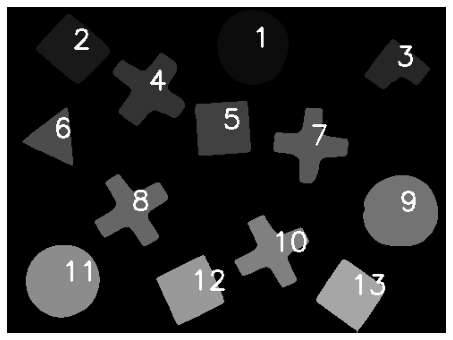

In [58]:
shapesR_cv_c = shapesR_cv.copy()
obj = []
moments = []
moments_HU = []

for s in range(1, retval):
    obj.append(((shapes_cv == s).astype(np.int)).astype('uint8'))
    moments.append(cv2.moments(obj[s - 1]))
    moments_HU.append(cv2.HuMoments(moments[s - 1]))
    cv2.putText(shapesR_cv_c, str(s), (int(centroids[s, 0]), int(centroids[s,1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (20, 0, 0), 2)

plt.figure(figsize=(13, 6))
plt.imshow(shapesR_cv_c, cmap='gray')
plt.axis('off')
plt.show()

In [59]:
for j in range(7):
    print(f"I{j}:", end=' ')
    for i in range(len(moments_HU)):
        print(moments_HU[i][j], end='\t ')
    print()

I0: [0.25020391]	 [0.25794909]	 [0.25705906]	 [0.15915482]	 [0.15915587]	 [0.16669218]	 [0.16671843]	 [0.16665996]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I1: [2.3092849e-09]	 [1.08977954e-06]	 [1.5026187e-07]	 [3.16293019e-08]	 [1.30608986e-07]	 [2.37382411e-06]	 [1.5005425e-06]	 [2.23442217e-06]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I2: [2.31959783e-05]	 [2.86216549e-05]	 [2.73926132e-05]	 [8.22063073e-10]	 [9.50757712e-09]	 [6.35596477e-10]	 [2.85079199e-09]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I3: [1.47326898e-06]	 [1.77622893e-06]	 [1.73732679e-06]	 [7.36340232e-14]	 [3.34678824e-13]	 [5.31257419e-11]	 [1.86840551e-10]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I4: [8.61250351e-12]	 [1.26306067e-11]	 [1.19840998e-11]	 [-3.49346145e-25]	 [-1.33716847e-24]	 [4.01564382e-21]	 [1.08808452e-19]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I5: [7.07979694e-11]	 [-1.85400651e-09]	 [-6.73378794e-10]	 [1.15762233e-17]	 [-5.8288278e-17]	 [-5.9978146e-14]	 [-6.24180205e-15]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 [0.]	 
I6: 

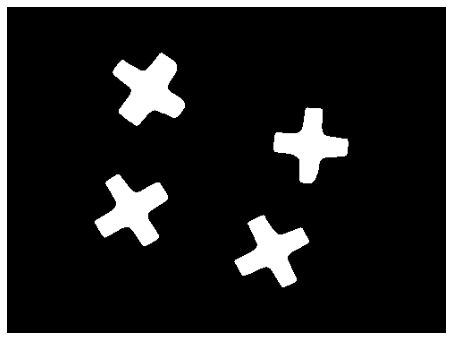

In [60]:
selected_s = recognize_obj(shapesR_cv.astype('uint8'), [0.195])
plt.figure(figsize=(13, 6))
plt.imshow(selected_s, cmap='gray')
plt.axis('off')
plt.show()